# Algoritma Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,OPTICS
import seaborn as sns
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram as scipy_dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline
%timeit
import random
import timeit

# from scipy.stats import zscore


In [2]:
csv_path="../Data/Data_iris.csv"
df=pd.read_csv(csv_path)
df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0

In [3]:
# df_data = pd.DataFrame(MinMaxScaler().fit_transform(df.iloc[:, [0, 2, 3]]), columns=df.columns[[0, 2, 3]])
# df_data

In [4]:
df_data=pd.DataFrame(df.iloc[:, [0, 2, 3]])
df_data

SepalLength  PetalLength  PetalWidth
0            5.1          1.4         0.2
1            4.9          1.4         0.2
2            4.7          1.3         0.2
3            4.6          1.5         0.2
4            5.0          1.4         0.2
..           ...          ...         ...
142          6.7          5.2         2.3
143          6.3          5.0         1.9
144          6.5          5.2         2.0
145          6.2          5.4         2.3
146          5.9          5.1         1.8

[147 rows x 3 columns]

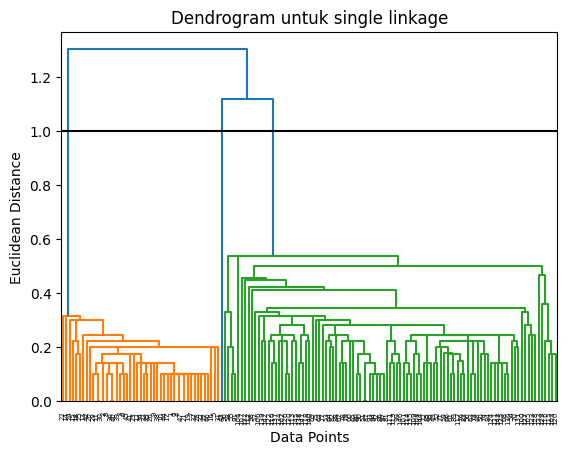

Nilai k optimal untuk metode Single linkage adalah: 2


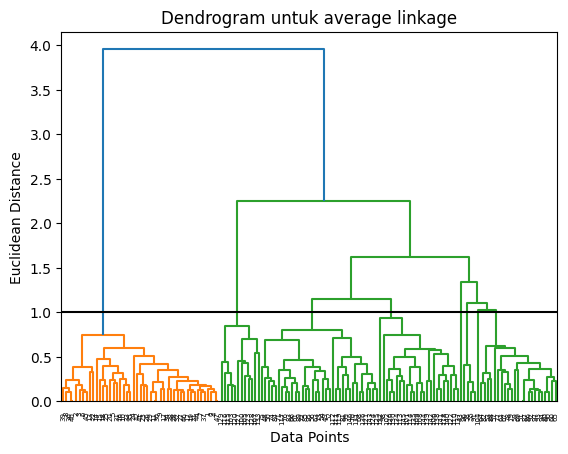

Nilai k optimal untuk metode Average linkage adalah: 2


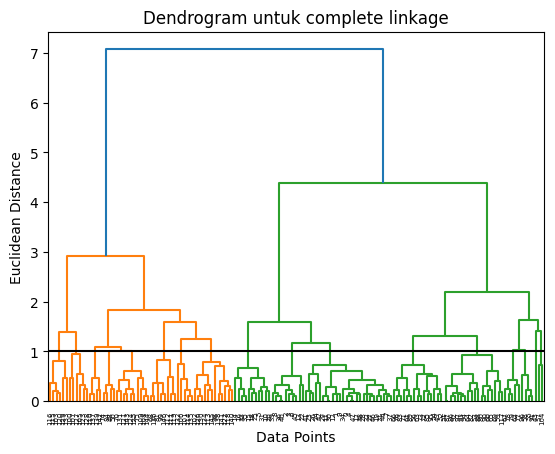

Nilai k optimal untuk metode Complete linkage adalah: 3


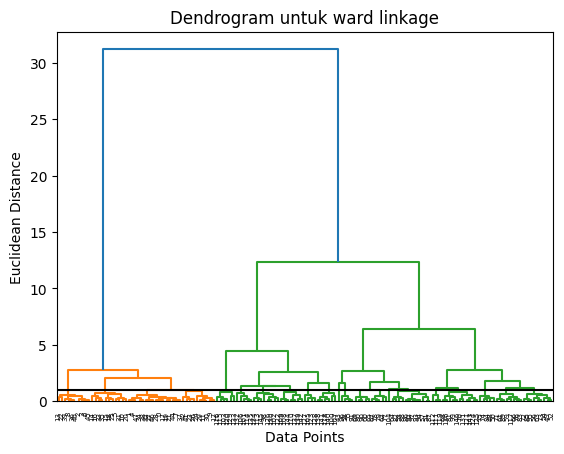

Nilai k optimal untuk metode Ward linkage adalah: 2
Parameter terbaik: {'linkage': 'single', 'n_clusters': 2}


In [8]:
# Daftar metode linkage yang ingin diuji
linkage_methods = ['single', 'average', 'complete', 'ward']

# Inisialisasi list untuk menyimpan nilai Silhouette Score terbaik dan parameter terbaik
best_silhouette_score = -1
best_params = {}

for method in linkage_methods:
    # Menggambar dendrogram (jika perlu, bagian ini bisa diaktifkan)
    Z = linkage(df_data, method=method)
    dendrogram(Z)
    plt.title(f"Dendrogram untuk {method} linkage")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    max_d = 1  # Batas threshold
    plt.axhline(y=max_d, c='k')  # Menambahkan garis horizontal untuk batas threshold
    plt.show()
    
    # Inisialisasi list untuk menyimpan nilai Silhouette Score
    silhouette_scores = []
    k_range = range(2, 11)

    # Loop melalui setiap nilai k
    for k in k_range:
        # Melakukan klasterisasi dengan Agglomerative Clustering
        clusterer = AgglomerativeClustering(n_clusters=k, linkage=method)
        cluster_labels = clusterer.fit_predict(df_data)
        
        # Menghitung Silhouette Score
        avg_silhouette_score = silhouette_score(df_data, cluster_labels)
        
        # Menambahkan nilai Silhouette Score ke dalam list
        silhouette_scores.append(avg_silhouette_score)
    
    # Mencari nilai k dengan Silhouette Score tertinggi
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"Nilai k optimal untuk metode {method.capitalize()} linkage adalah: {optimal_k}")
    
    # Memeriksa apakah nilai Silhouette Score terbaik
    if max(silhouette_scores) > best_silhouette_score:
        best_silhouette_score = max(silhouette_scores)
        best_params['linkage'] = method
        best_params['n_clusters'] = optimal_k

print("Parameter terbaik:", best_params)

# Data Berlabel

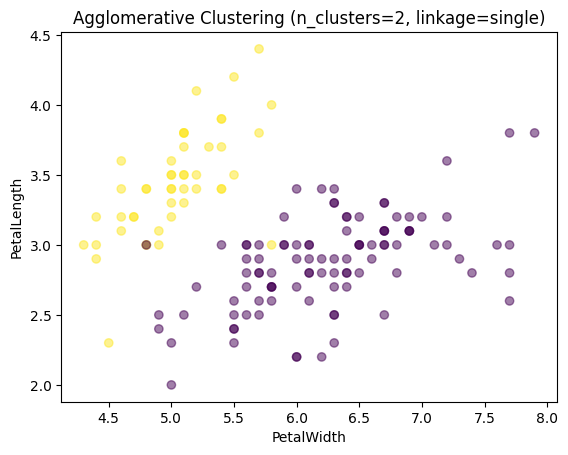

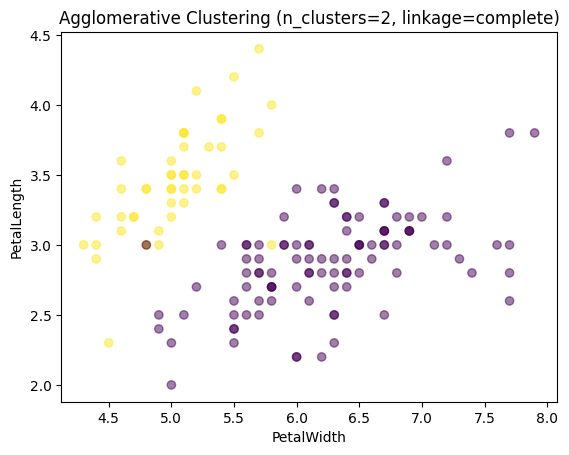

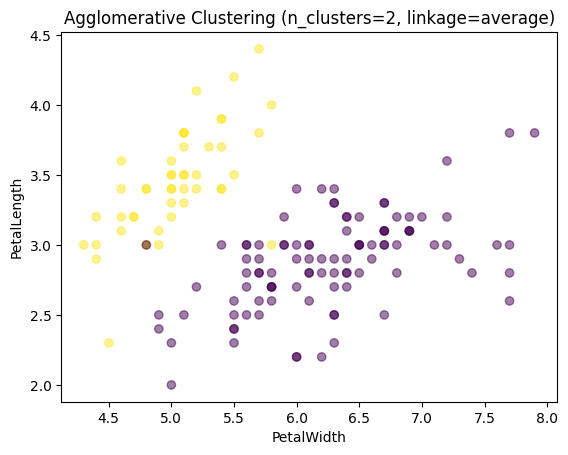

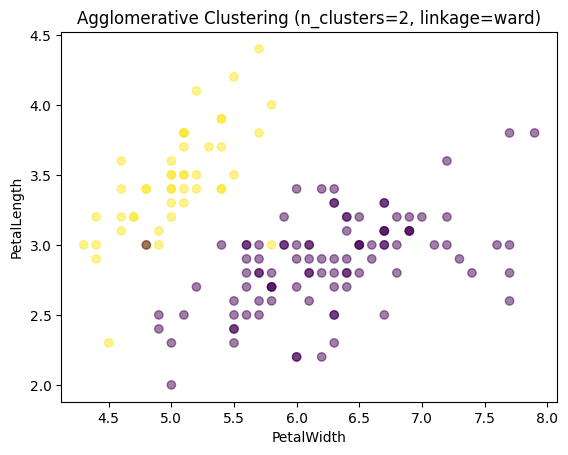

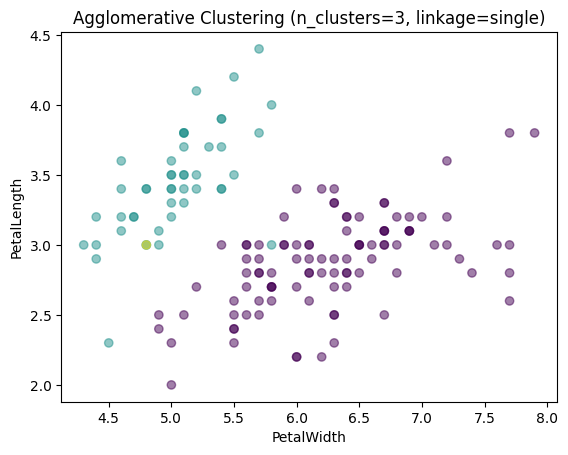

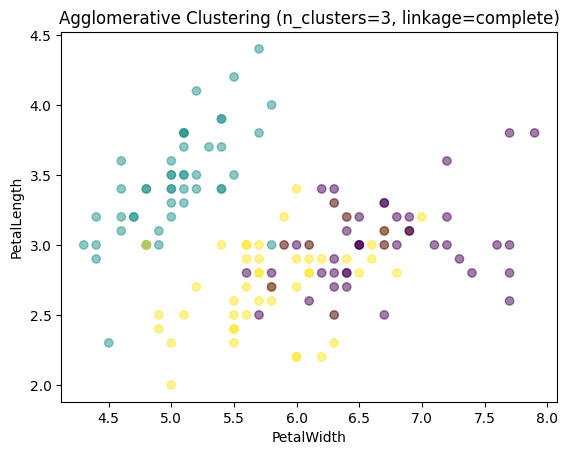

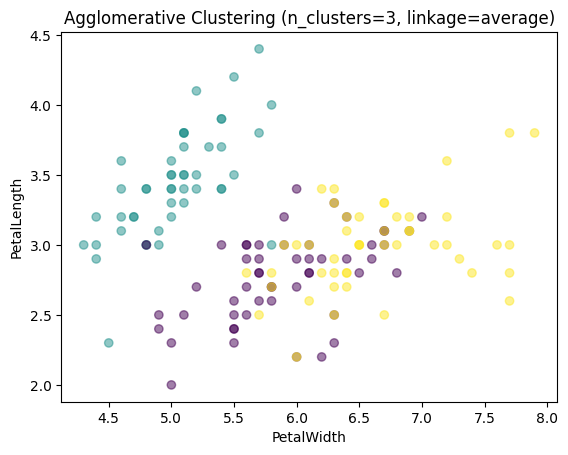

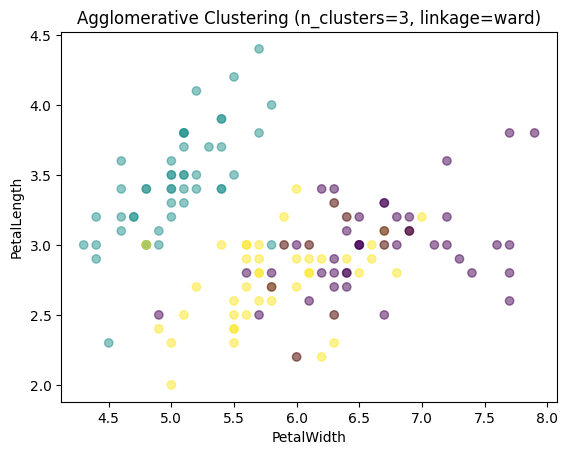

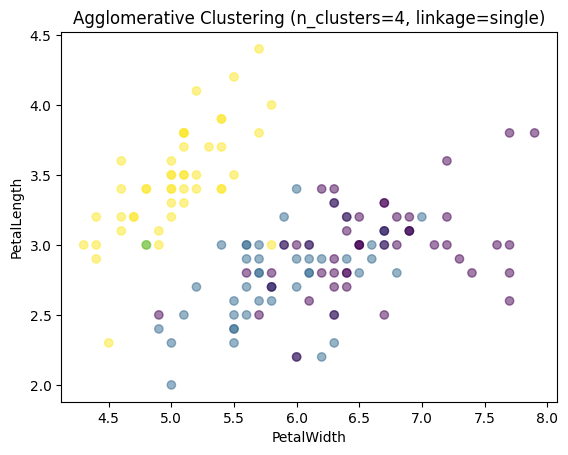

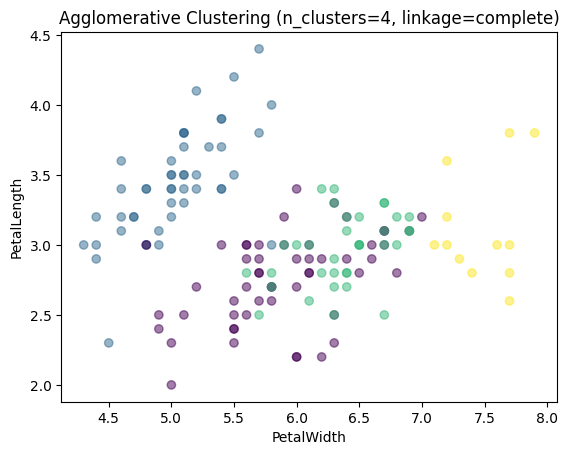

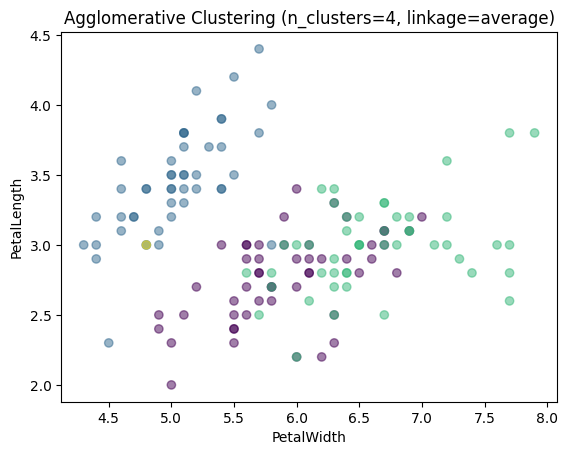

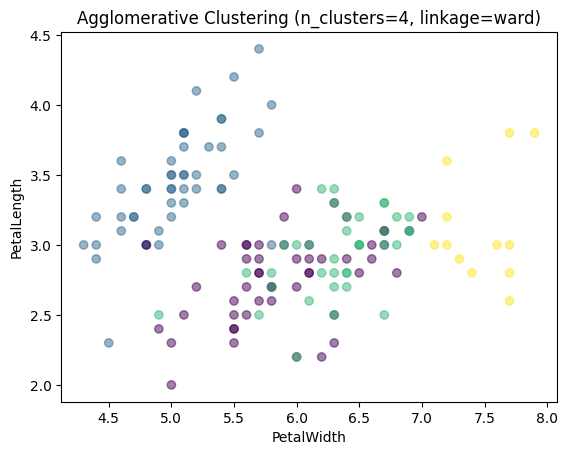

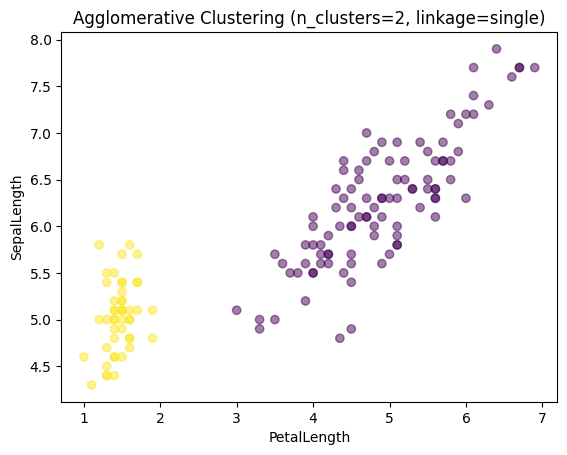

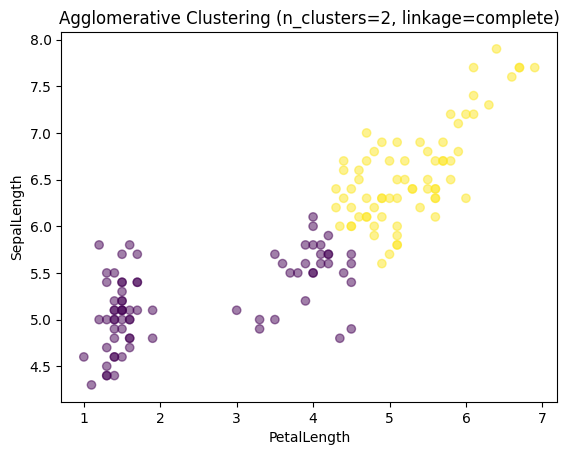

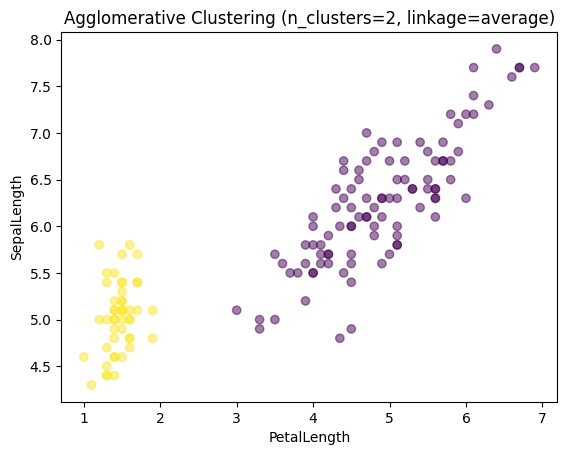

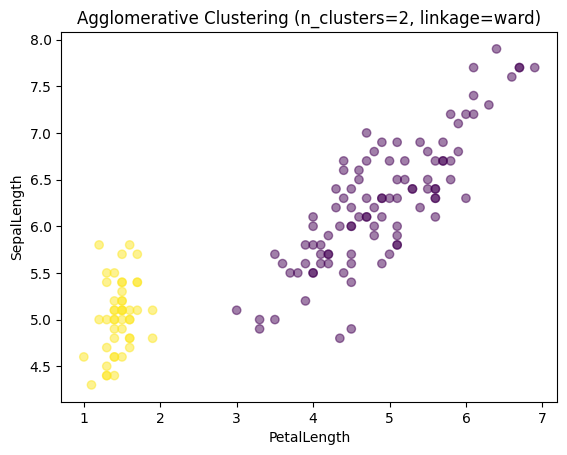

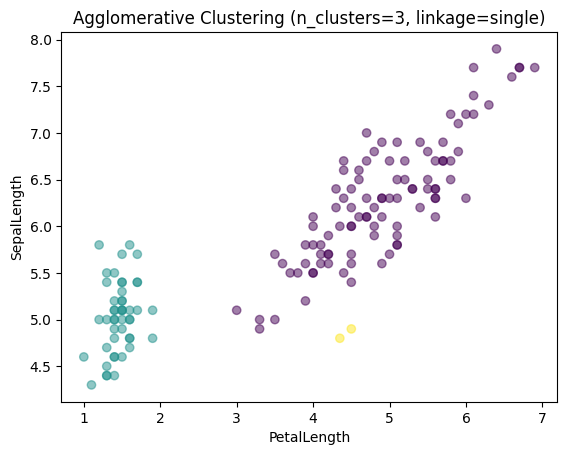

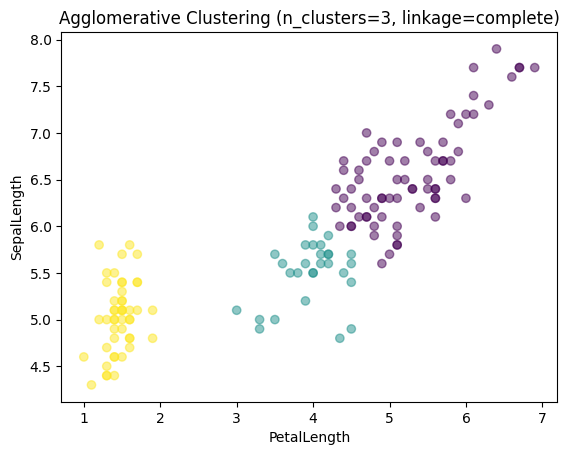

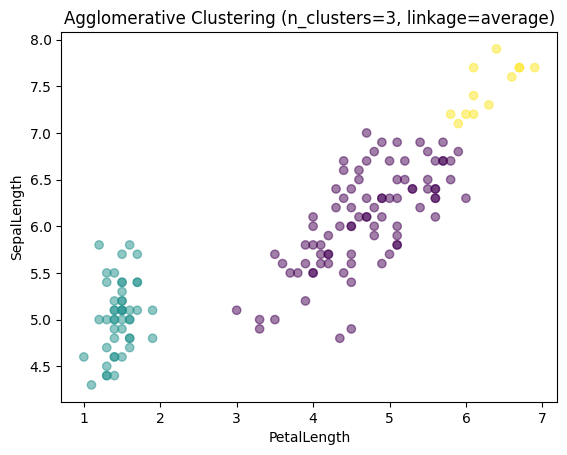

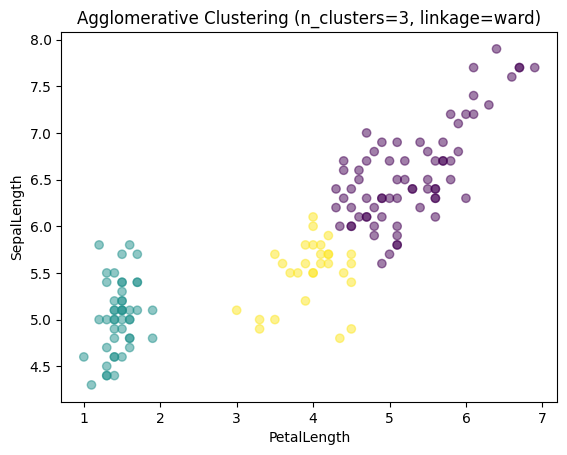

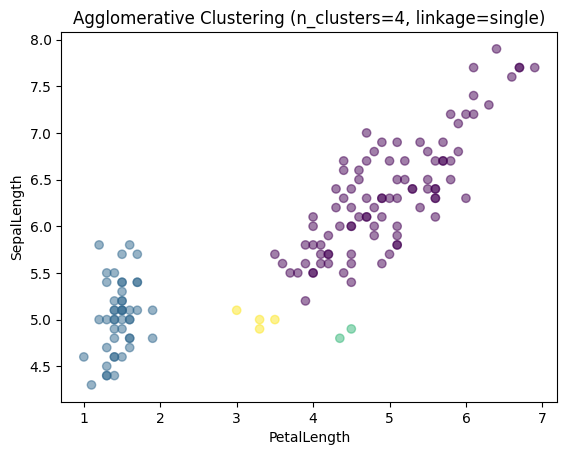

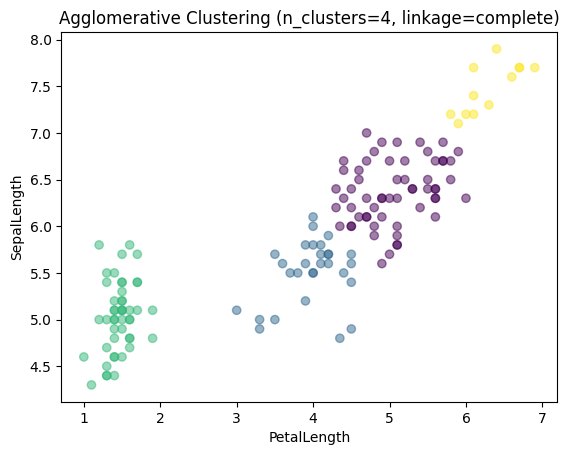

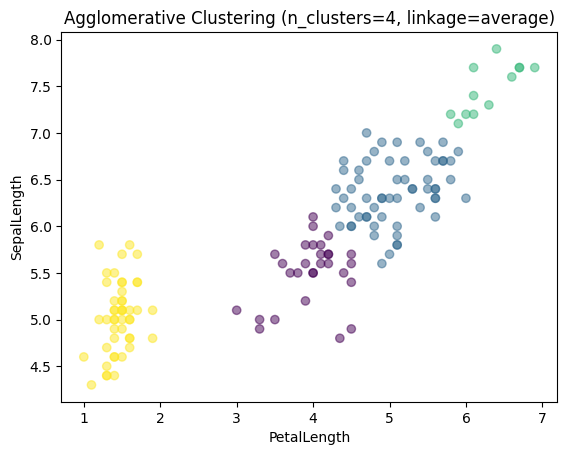

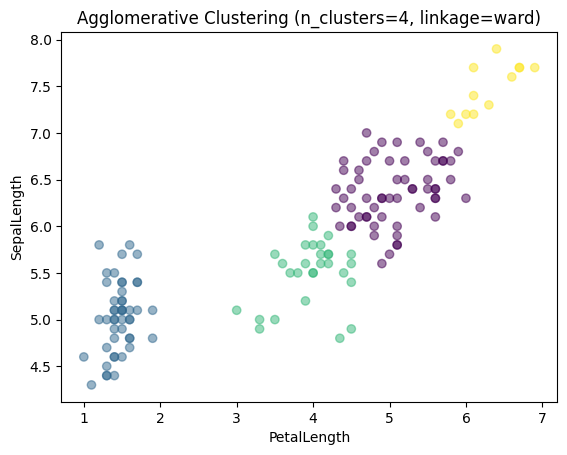

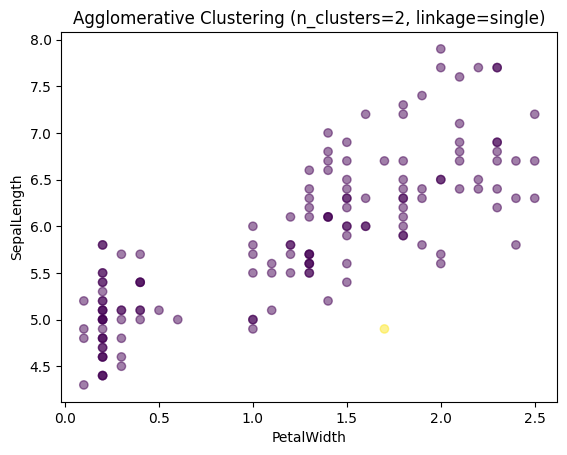

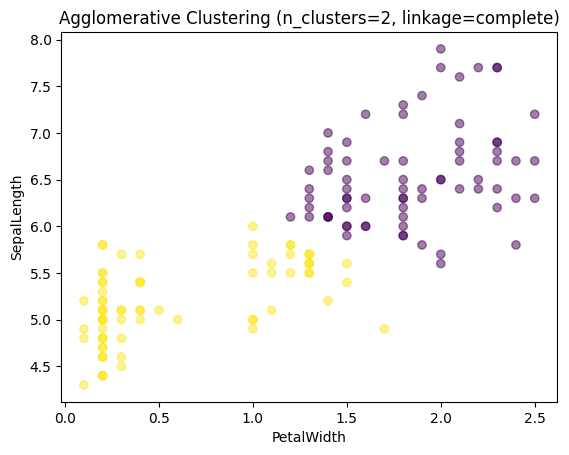

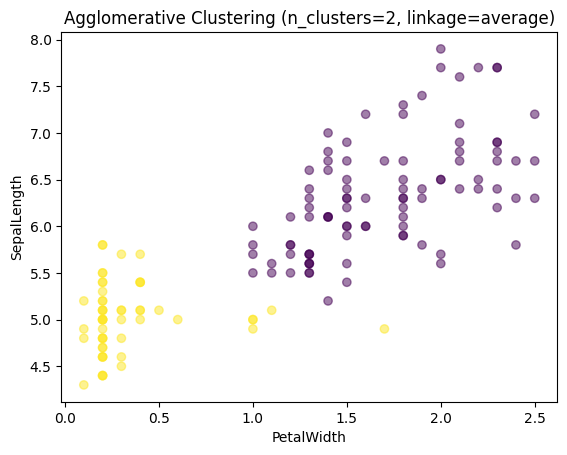

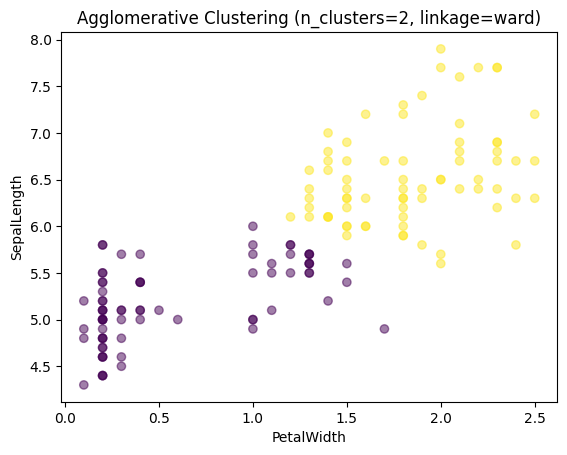

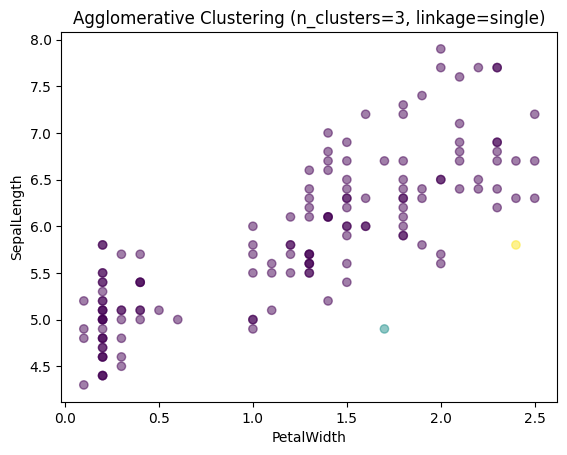

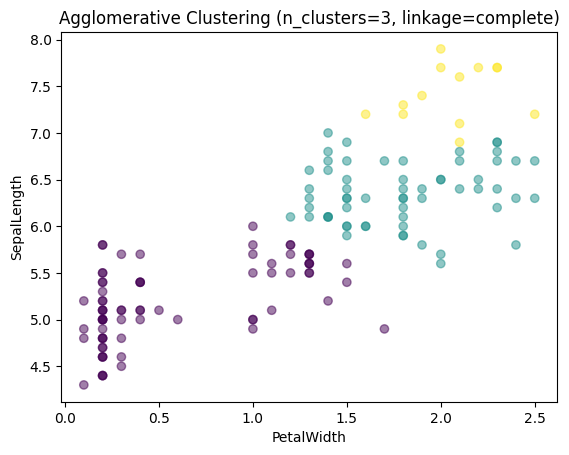

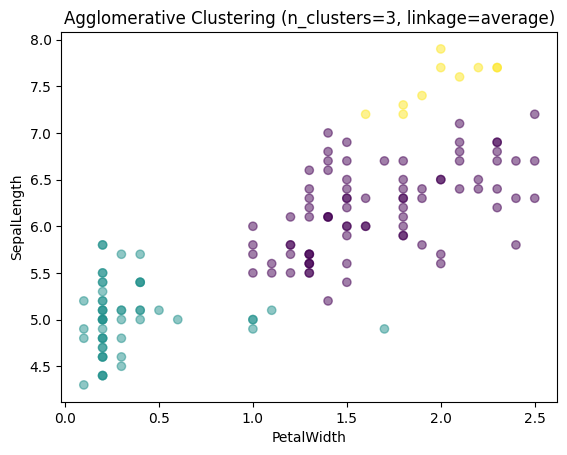

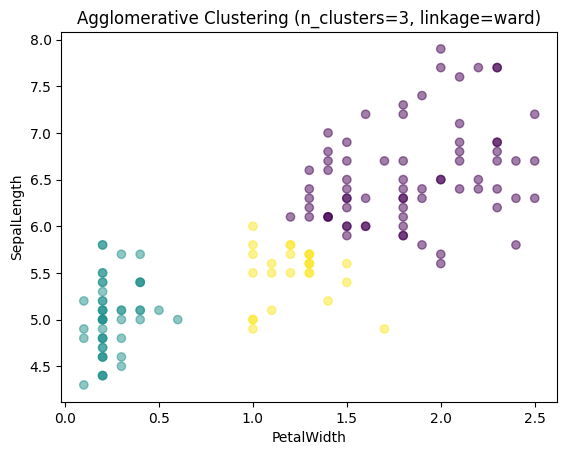

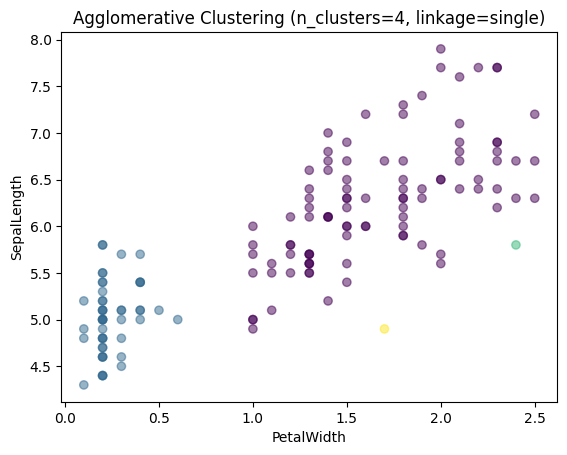

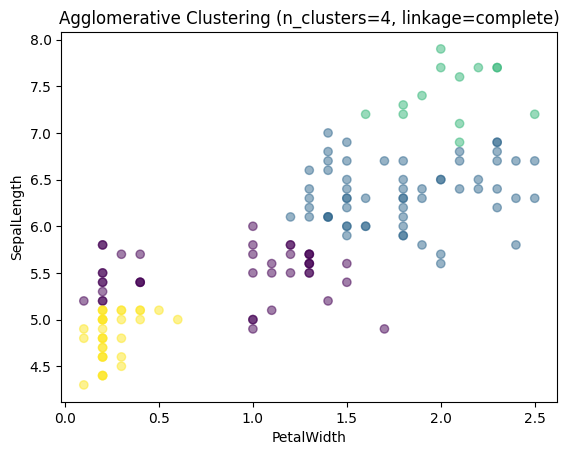

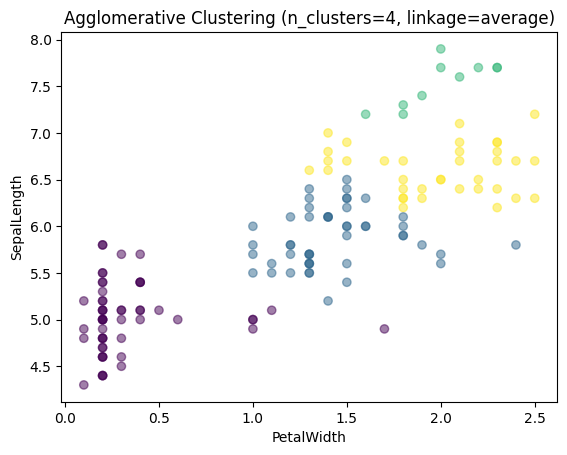

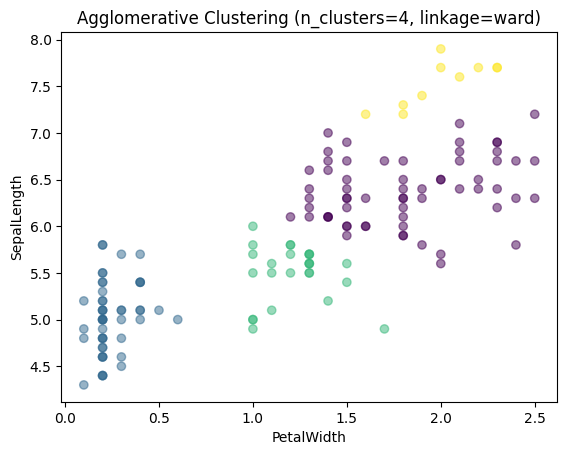

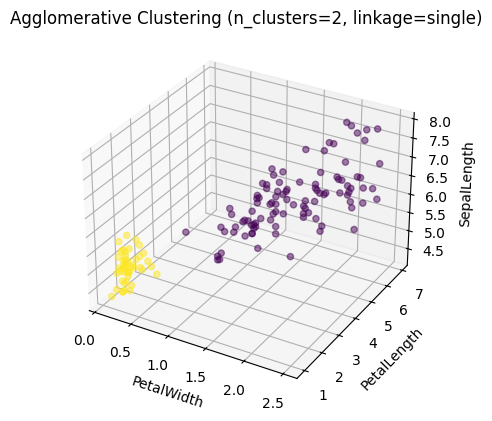

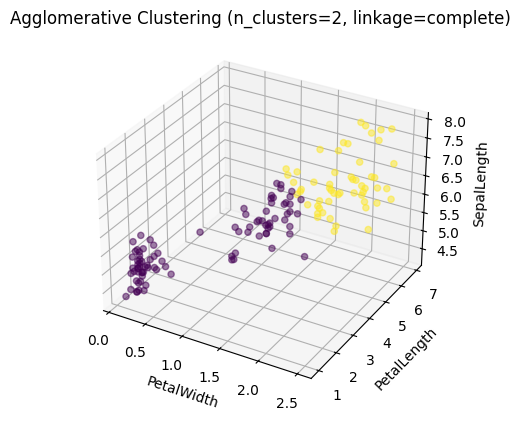

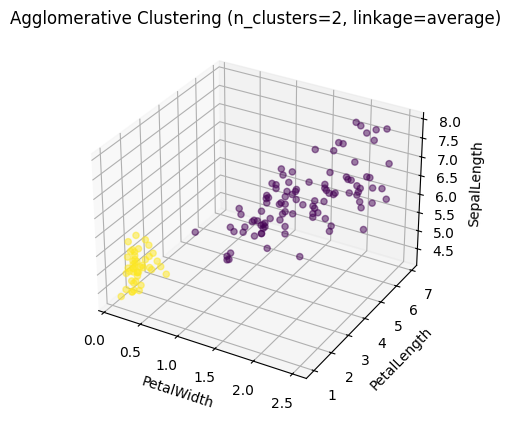

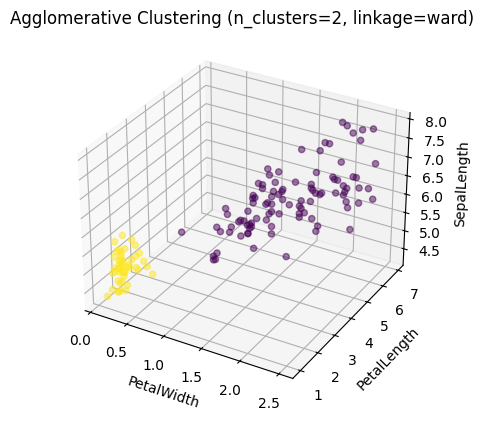

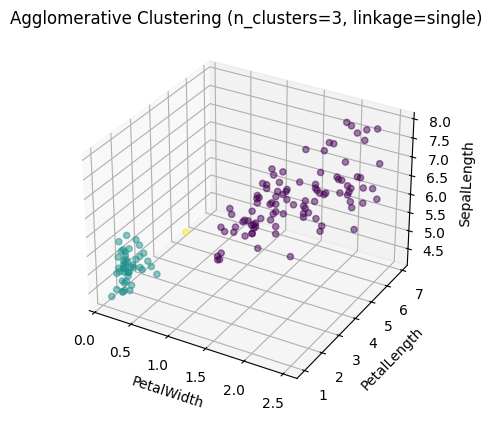

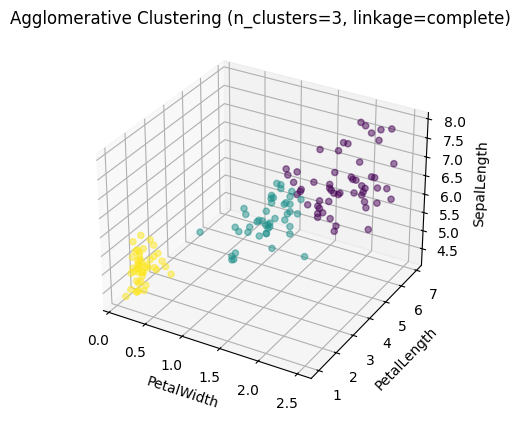

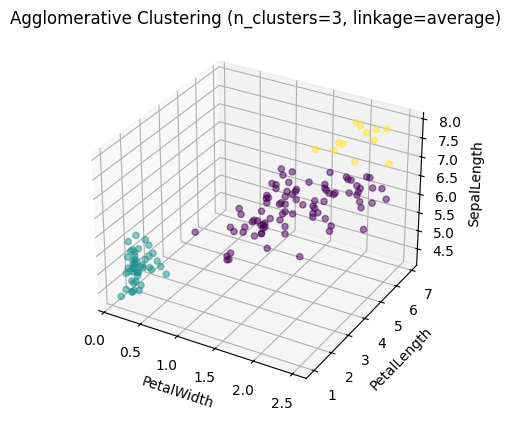

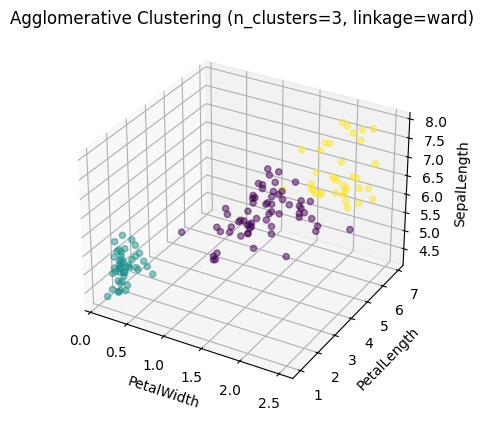

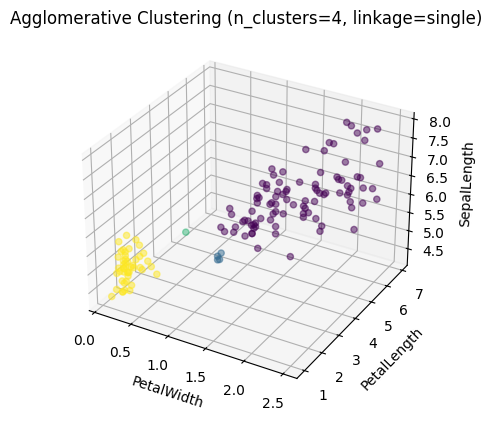

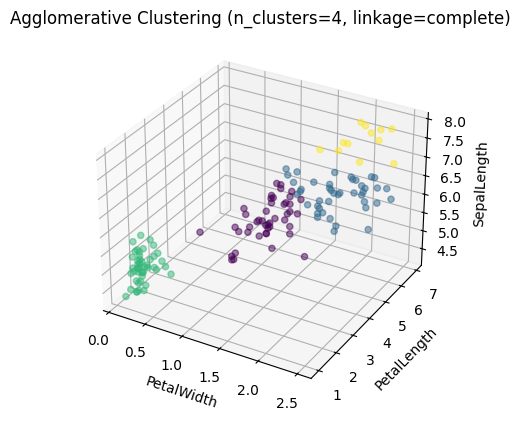

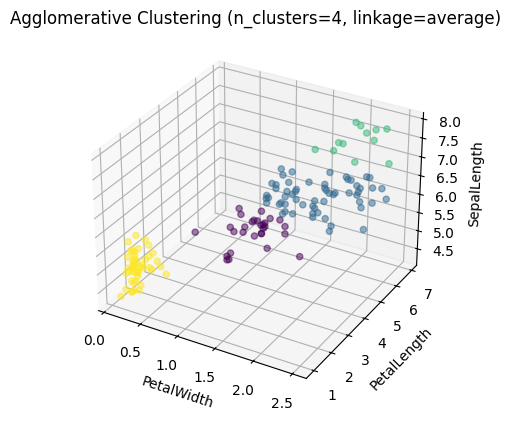

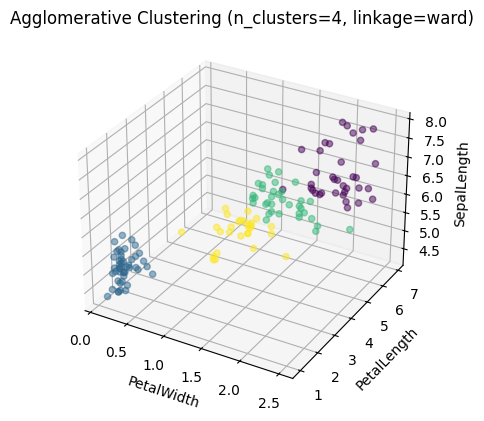

In [ ]:
n_clusters_list = [2, 3, 4]
linkage_list = ['single', 'complete', 'average', 'ward']

# Membuat scatterplot untuk setiap kombinasi atribut dan parameter clustering
for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hierarchical_cluster.fit_predict(df)
        
        # Menampilkan scatterplot
        plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
        plt.title(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})")
        plt.xlabel("PetalWidth")
        plt.ylabel("PetalLength")
        plt.show()

# Menampilkan scatterplot untuk kombinasi PetalLength dan SepalLength
for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hierarchical_cluster.fit_predict(df[['PetalLength', 'SepalLength']])
        
        # Menampilkan scatterplot
        plt.scatter(df['PetalLength'], df['SepalLength'], c=labels, cmap='viridis', alpha=0.5)
        plt.title(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})")
        plt.xlabel("PetalLength")
        plt.ylabel("SepalLength")
        plt.show()

# Menampilkan scatterplot untuk kombinasi PetalWidth dan SepalLength
for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hierarchical_cluster.fit_predict(df[['PetalWidth', 'SepalLength']])
        
        # Menampilkan scatterplot
        plt.scatter(df['PetalWidth'], df['SepalLength'], c=labels, cmap='viridis', alpha=0.5)
        plt.title(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})")
        plt.xlabel("PetalWidth")
        plt.ylabel("SepalLength")
        plt.show()

# Menampilkan scatterplot untuk kombinasi PetalWidth, PetalLength, dan SepalLength
for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hierarchical_cluster.fit_predict(df[['PetalWidth', 'PetalLength', 'SepalLength']])
        
        # Menampilkan scatterplot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df['PetalWidth'], df['PetalLength'], df['SepalLength'], c=labels, cmap='viridis', alpha=0.5)
        ax.set_title(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})")
        ax.set_xlabel("PetalWidth")
        ax.set_ylabel("PetalLength")
        ax.set_zlabel("SepalLength")
        plt.show()

# Data Tidak Berlabel

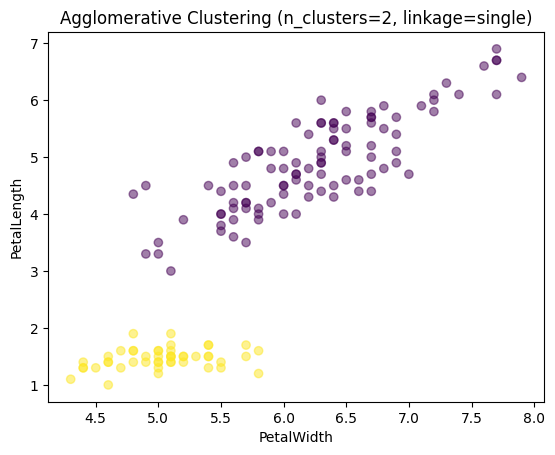

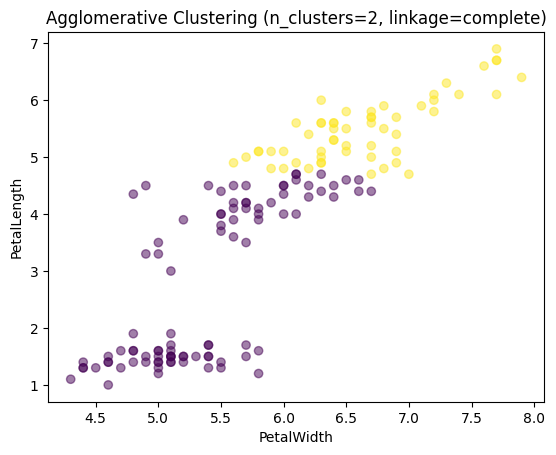

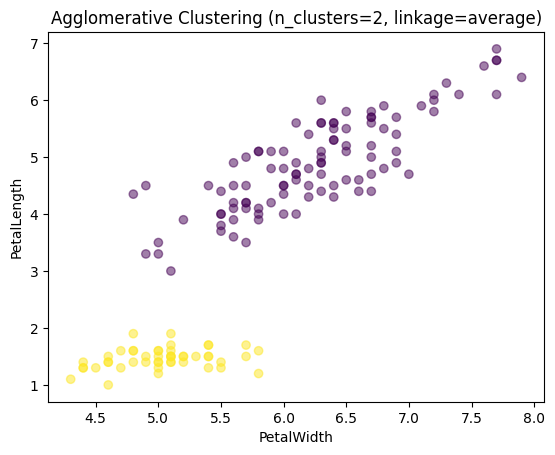

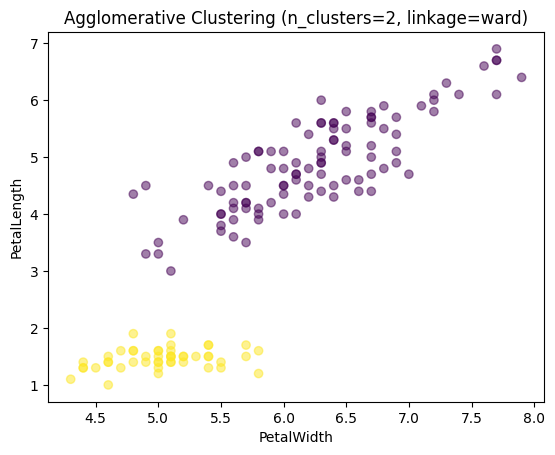

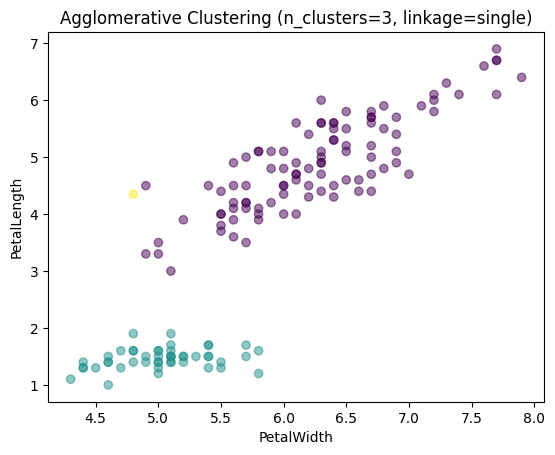

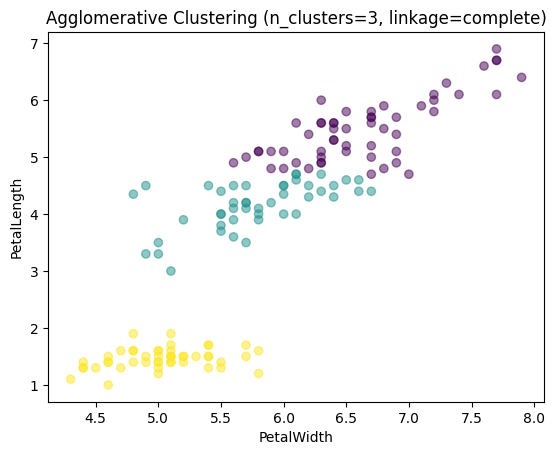

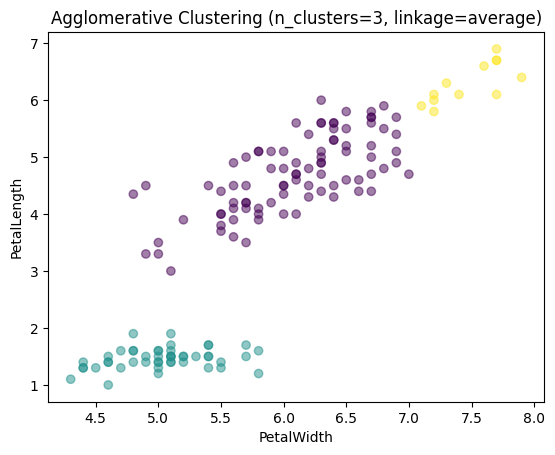

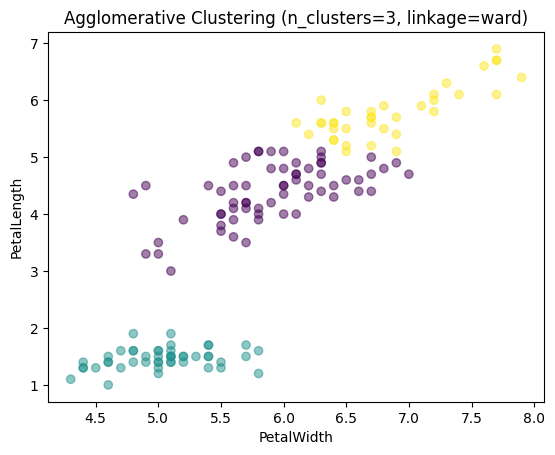

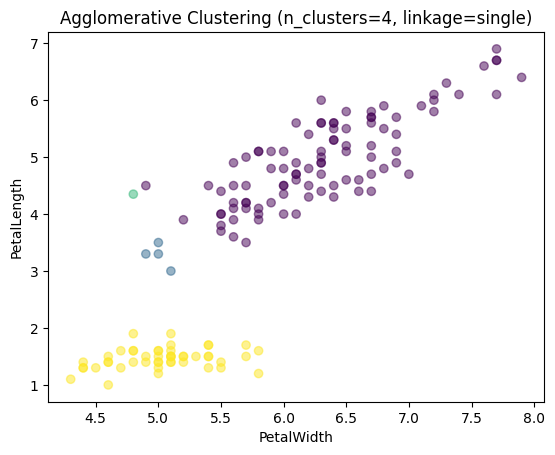

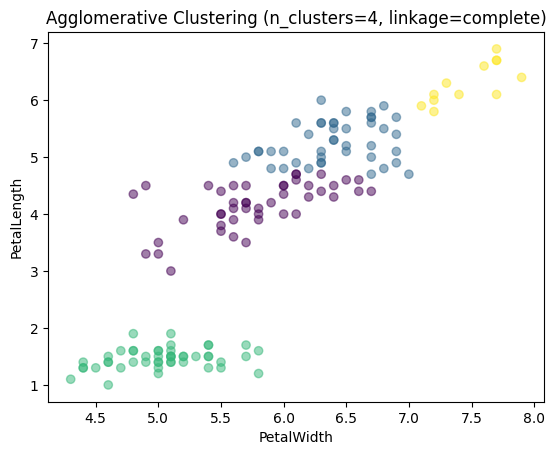

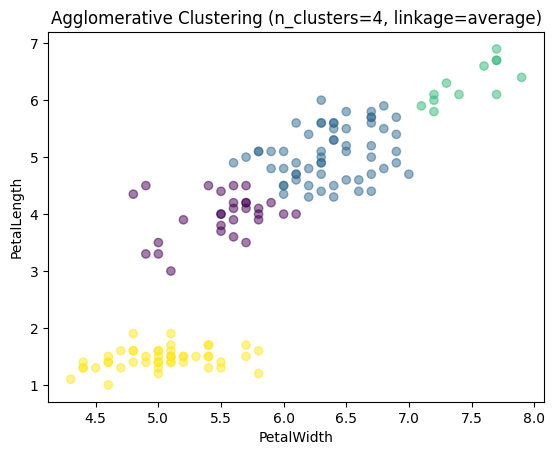

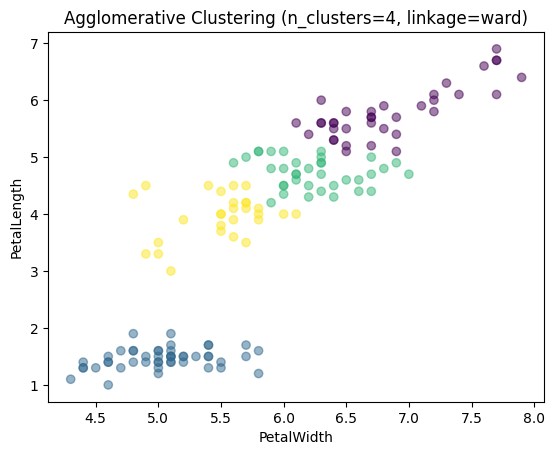

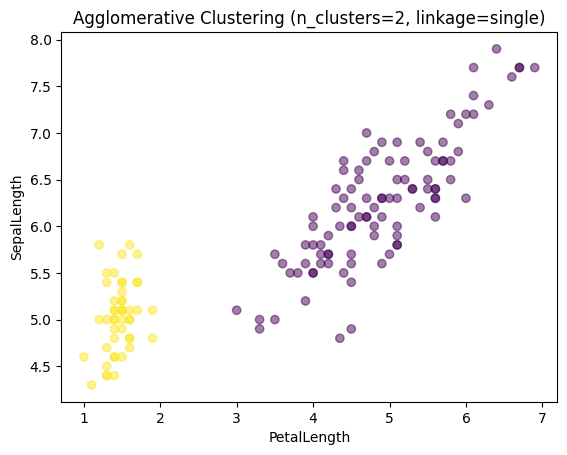

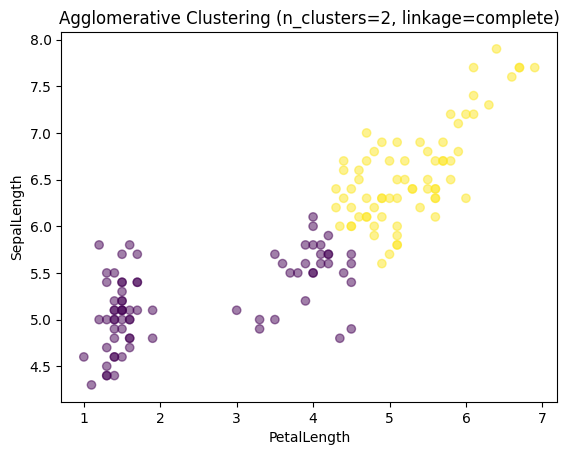

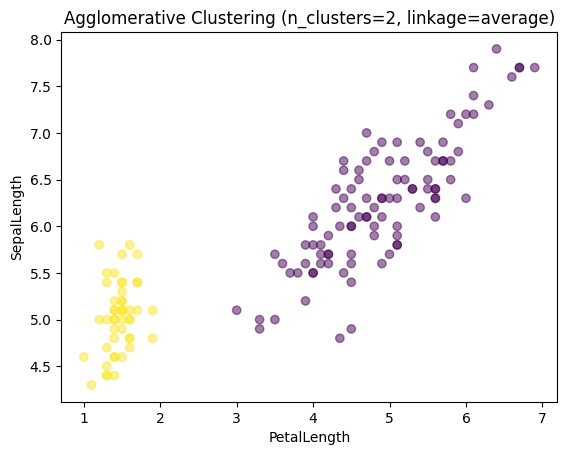

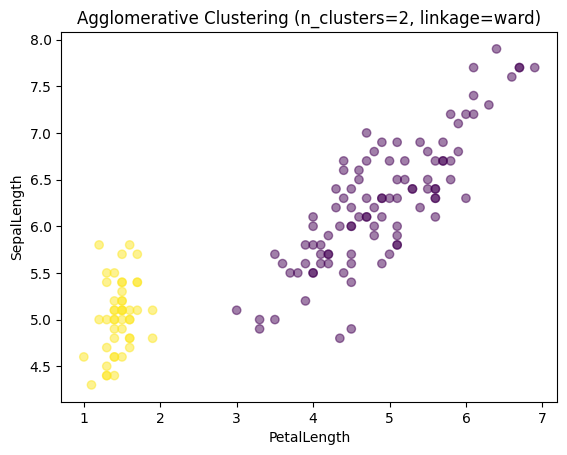

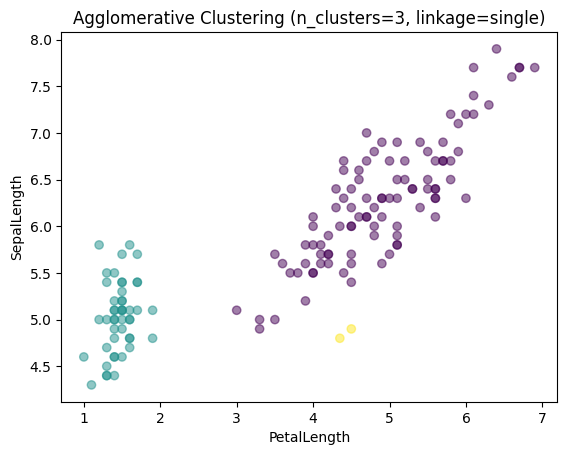

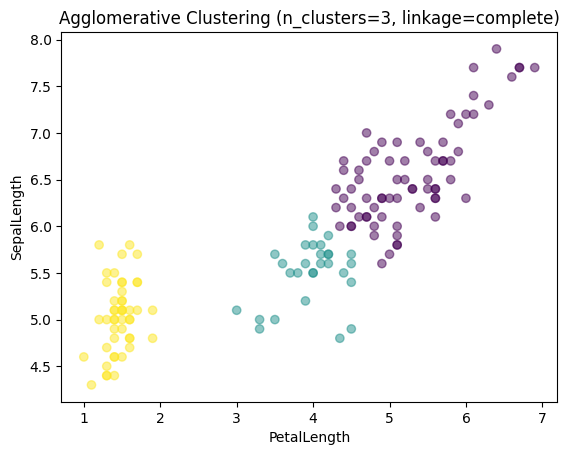

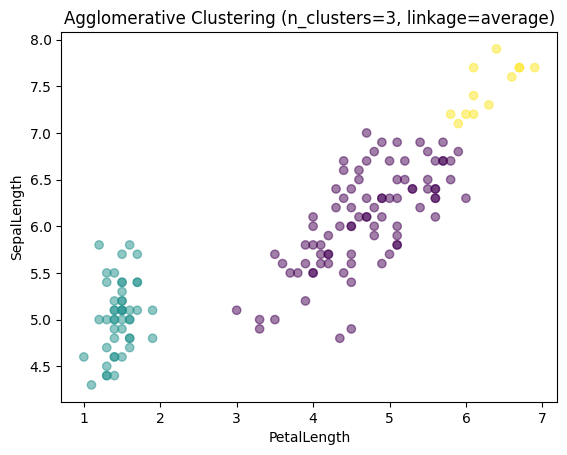

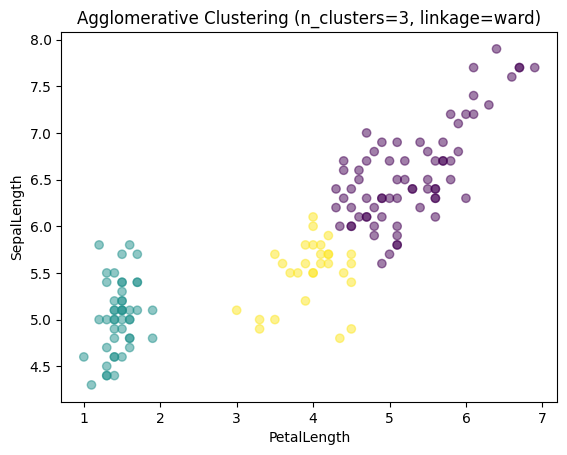

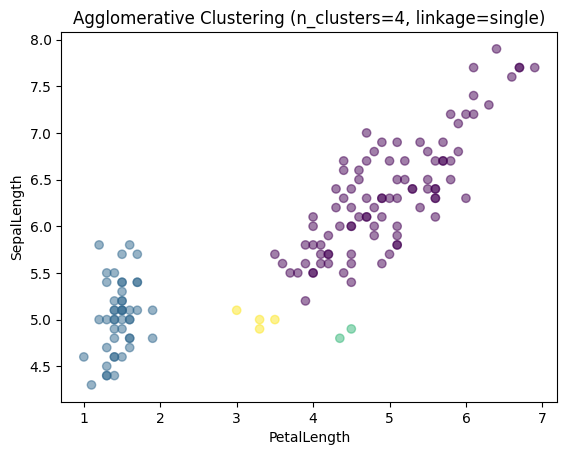

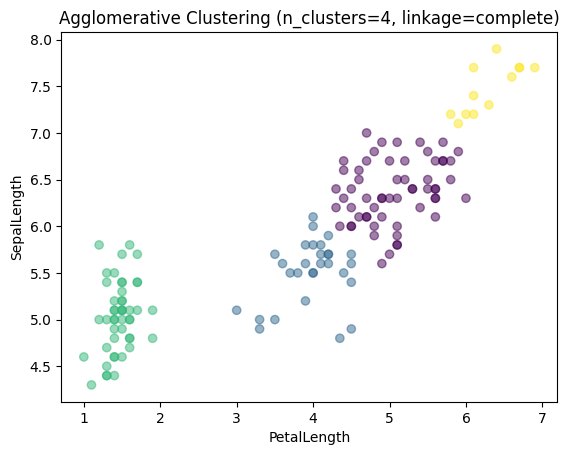

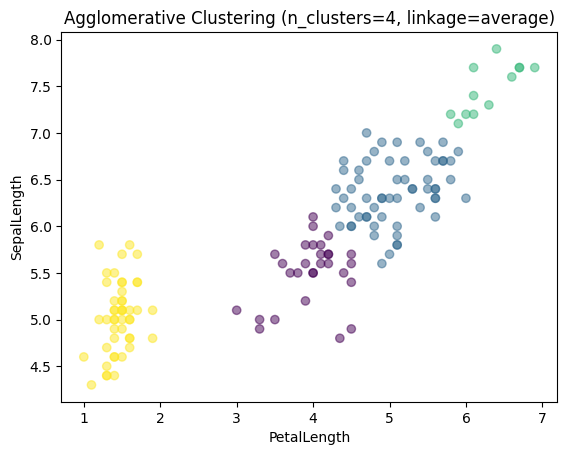

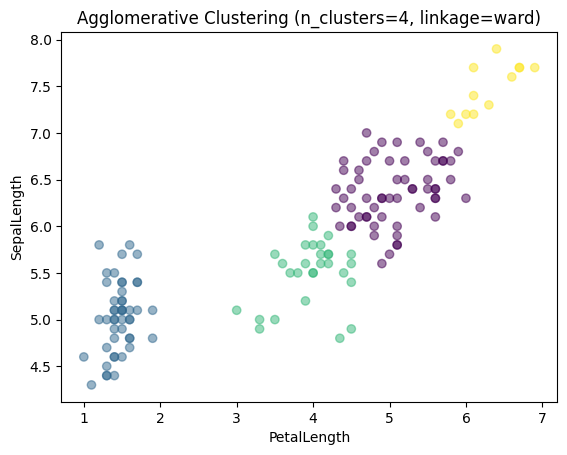

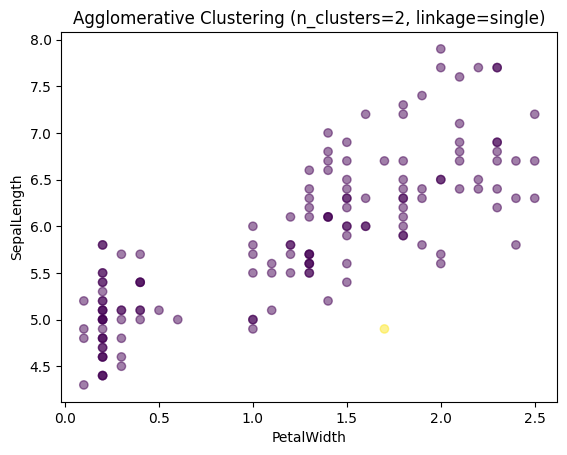

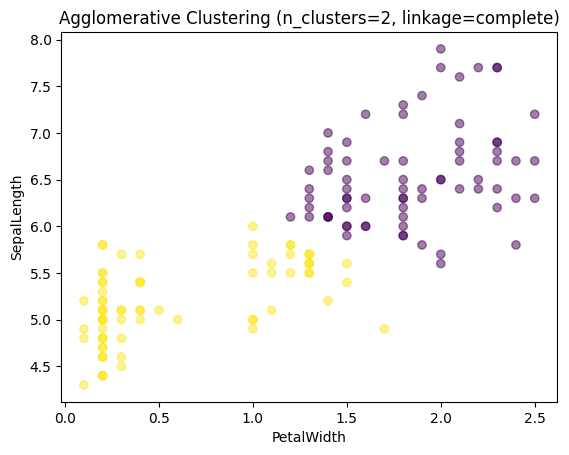

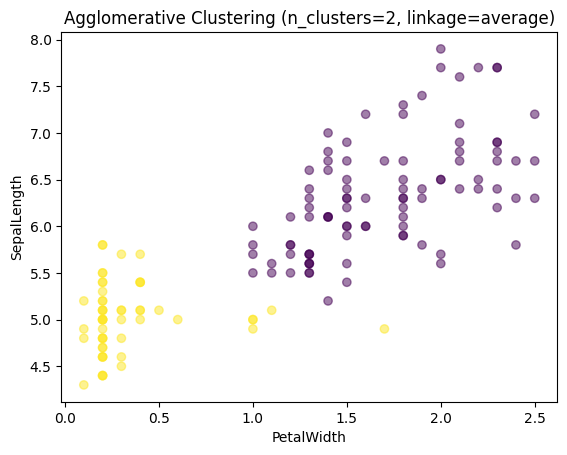

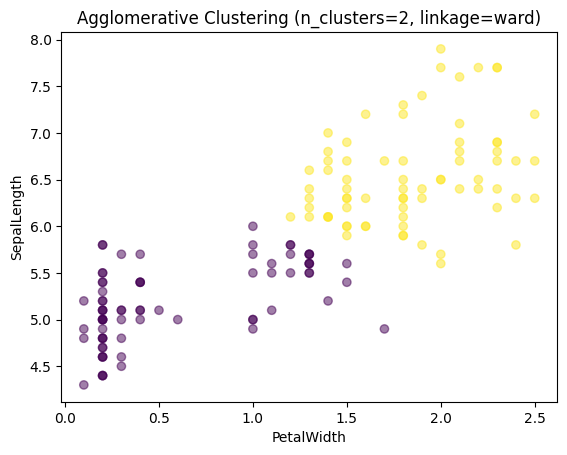

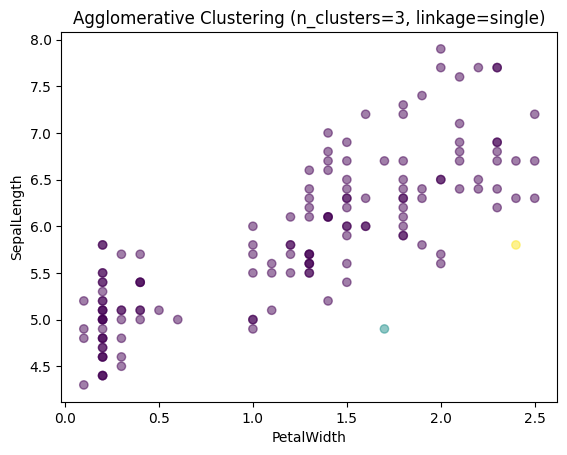

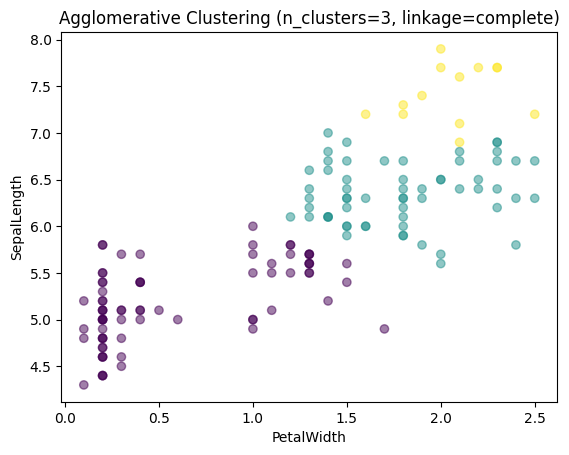

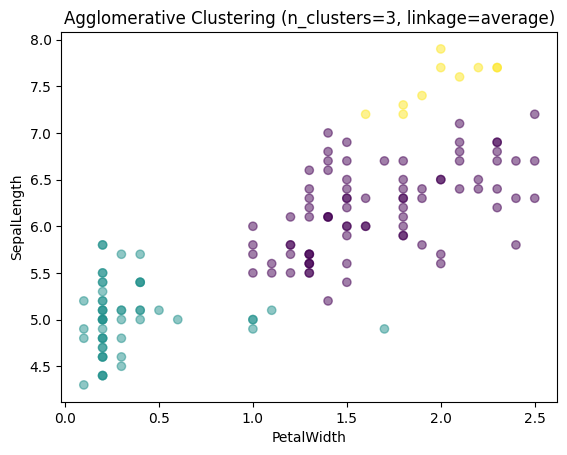

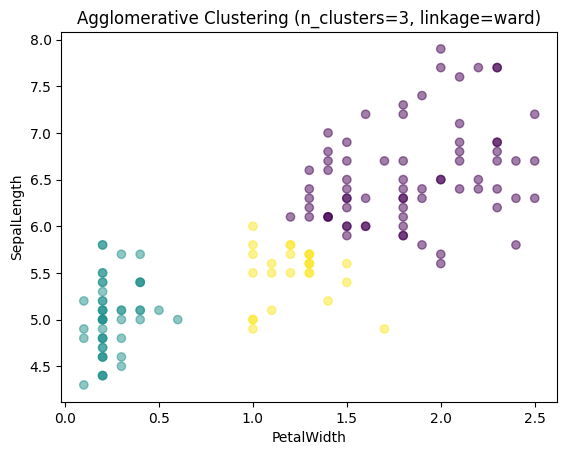

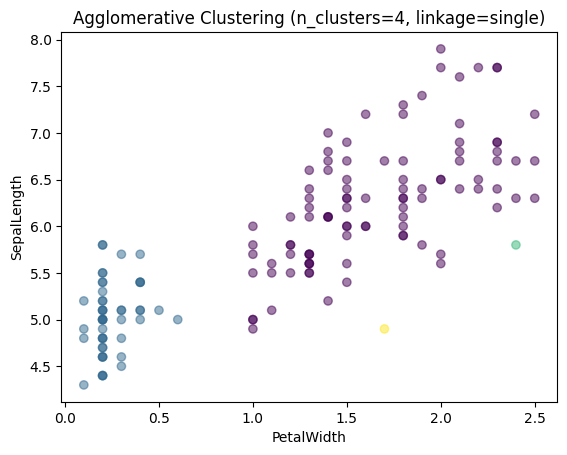

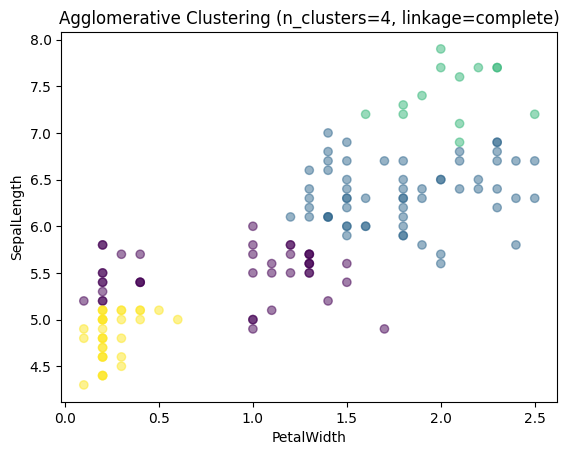

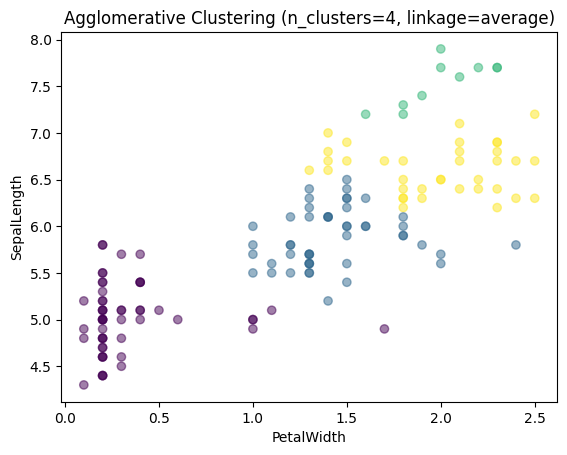

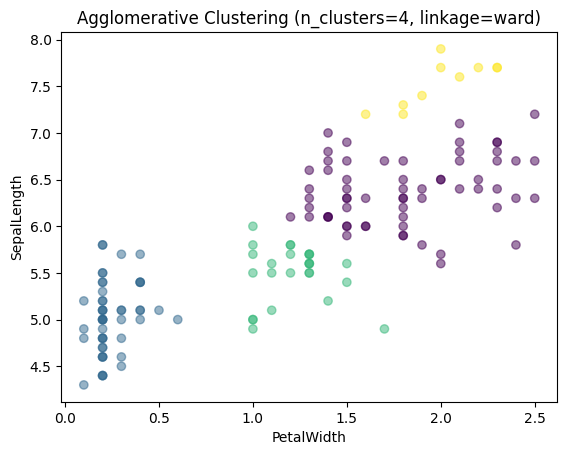

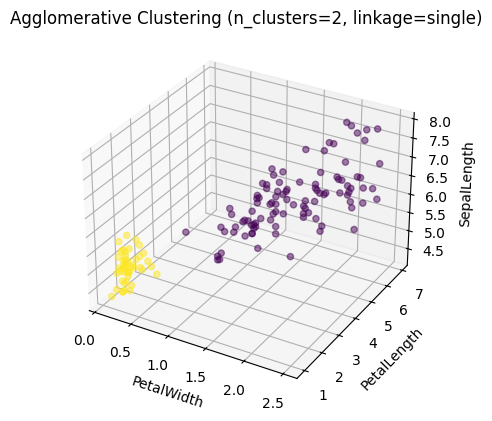

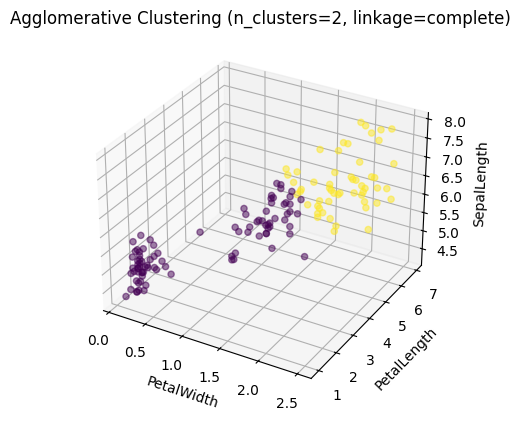

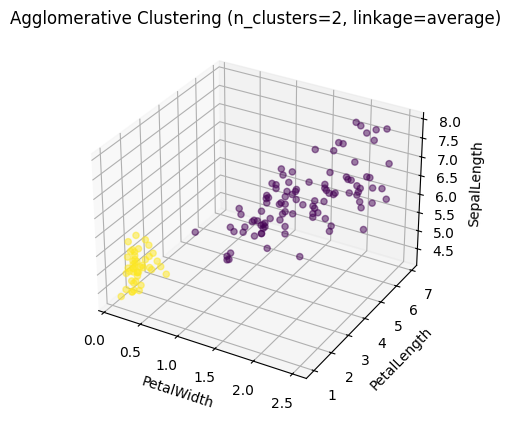

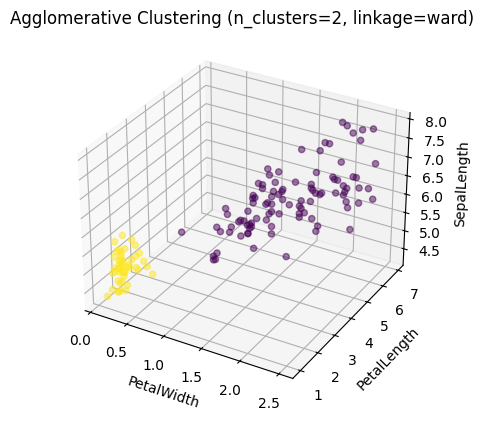

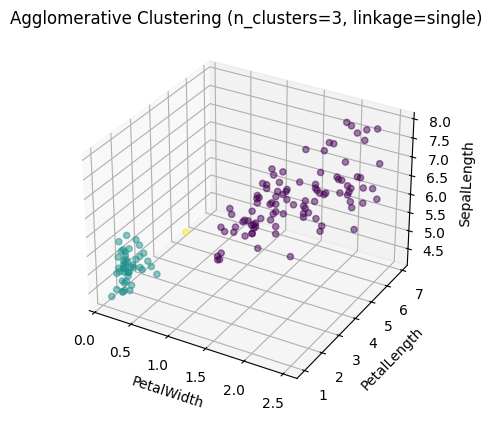

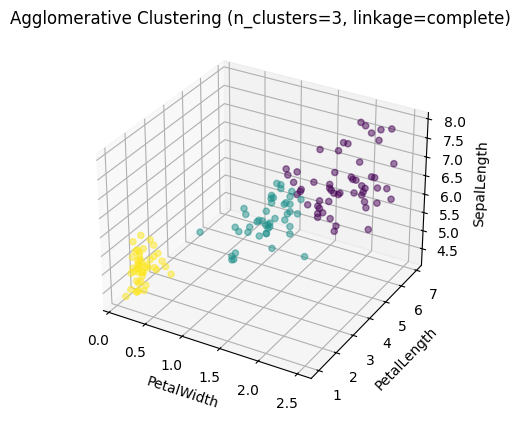

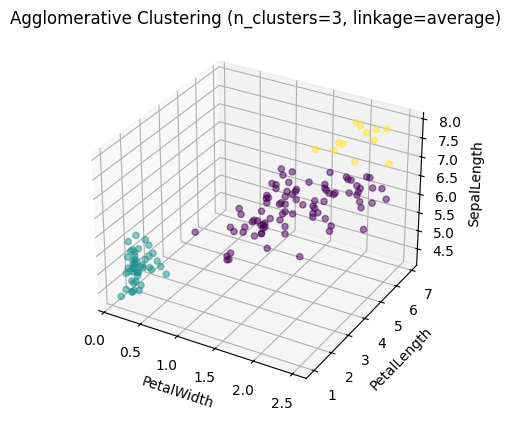

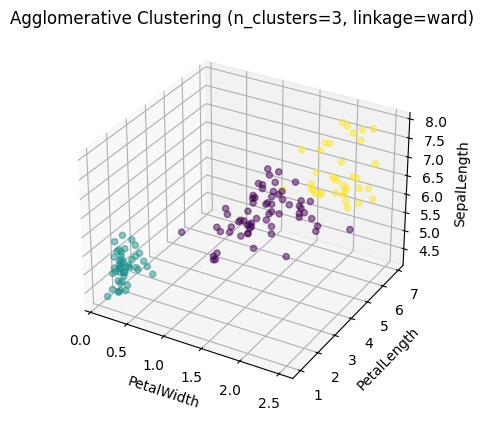

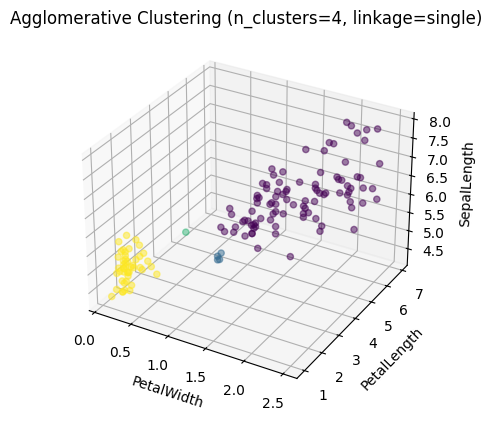

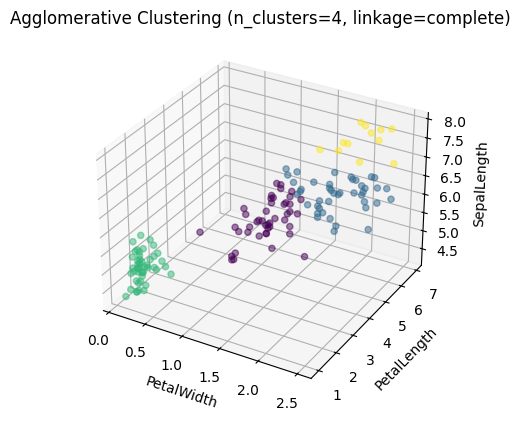

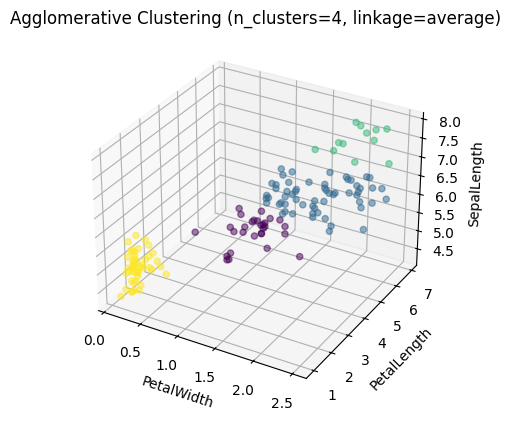

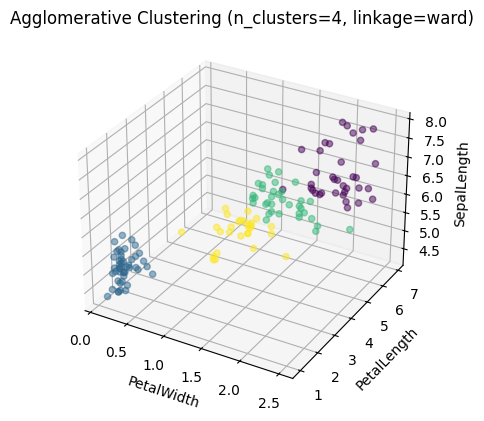

In [ ]:
n_clusters_list = [2, 3, 4]
linkage_list = ['single', 'complete', 'average', 'ward']

# Membuat scatterplot untuk setiap kombinasi atribut dan parameter clustering
for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hierarchical_cluster.fit_predict(df_data)
        
        # Menampilkan scatterplot
        plt.scatter(df_data.iloc[:, 0], df_data.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
        plt.title(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})")
        plt.xlabel("PetalWidth")
        plt.ylabel("PetalLength")
        plt.show()

# Menampilkan scatterplot untuk kombinasi PetalLength dan SepalLength
for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hierarchical_cluster.fit_predict(df_data[['PetalLength', 'SepalLength']])
        
        # Menampilkan scatterplot
        plt.scatter(df_data['PetalLength'], df_data['SepalLength'], c=labels, cmap='viridis', alpha=0.5)
        plt.title(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})")
        plt.xlabel("PetalLength")
        plt.ylabel("SepalLength")
        plt.show()

# Menampilkan scatterplot untuk kombinasi PetalWidth dan SepalLength
for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hierarchical_cluster.fit_predict(df_data[['PetalWidth', 'SepalLength']])
        
        # Menampilkan scatterplot
        plt.scatter(df_data['PetalWidth'], df_data['SepalLength'], c=labels, cmap='viridis', alpha=0.5)
        plt.title(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})")
        plt.xlabel("PetalWidth")
        plt.ylabel("SepalLength")
        plt.show()

# Menampilkan scatterplot untuk kombinasi PetalWidth, PetalLength, dan SepalLength
for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hierarchical_cluster.fit_predict(df_data[['PetalWidth', 'PetalLength', 'SepalLength']])
        
        # Menampilkan scatterplot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df_data['PetalWidth'], df_data['PetalLength'], df_data['SepalLength'], c=labels, cmap='viridis', alpha=0.5)
        ax.set_title(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})")
        ax.set_xlabel("PetalWidth")
        ax.set_ylabel("PetalLength")
        ax.set_zlabel("SepalLength")
        plt.show()

# Silhouette Score Data Tidak Berlabel

In [ ]:
# Melakukan klasterisasi dengan parameter terbaik
clusterer = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'])
cluster_labels = clusterer.fit_predict(df_data)



# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df_data, cluster_labels)

# Menampilkan nilai Silhouette Score
print("Silhouette Score untuk klasterisasi dengan parameter terbaik dengan data tanpa label:", silhouette_avg)

Silhouette Score untuk klasterisasi dengan parameter terbaik dengan data tanpa label: 0.6943302612848083


# Silhouette Score Data Berlabel

In [ ]:
# Melakukan klasterisasi dengan parameter terbaik
clusterer = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'])
cluster_labels = clusterer.fit_predict(df)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df, cluster_labels)

# Menampilkan nilai Silhouette Score
print("Silhouette Score untuk klasterisasi dengan parameter terbaik dengan data berlabel:", silhouette_avg)

Silhouette Score untuk klasterisasi dengan parameter terbaik dengan data berlabel: 0.6700325278922058


# Supervised Learning

- KNN
- Decision Trees
- Random Forests
- SVM

In [ ]:
X = df.iloc[:,[0,2,3]]
y = df.Species
# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definisikan daftar model yang akan digunakan
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

target_names = ['Setosa', 'Versicolor', 'Virginica']

# Latih dan evaluasi model-model tersebut
for name, model in models.items():
    print("Training", name)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    report = classification_report(y_test, y_pred, target_names=target_names)
    print("Classification Report for", name)
    print(report)
    print()

Training K-Nearest Neighbors
Accuracy: 0.9666666666666667
Classification Report for K-Nearest Neighbors
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Training Decision Tree


Accuracy: 0.9333333333333333
Classification Report for Decision Tree
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Training Random Forest
Accuracy: 0.9333333333333333
Classification Report for Random Forest
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Training Support Vector Machine
Accuracy: 0.9666666666666667
Classification